In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, BatchNormalization, Flatten, Dropout, Activation, MaxPooling2D
from keras.utils import to_categorical
from keras.optimizers import adam, RMSprop
from keras import regularizers, optimizers
from keras.callbacks import ReduceLROnPlateau
from keras.datasets import cifar10

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 13s 0us/step


In [0]:
X_train = X_train.astype('float32')
X_train /= 255
X_test = X_test.astype('float32')
X_test /= 255

In [0]:
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes) 

In [6]:
X_val = X_train[:10000]
y_val = y_train[:10000]
X_train = X_train[10000:]
y_train = y_train[10000:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((40000, 32, 32, 3), (40000, 10), (10000, 32, 32, 3), (10000, 10))

In [0]:
batch_size = 32
weight_decay = 1e-6

In [8]:
y_train.shape

(40000, 10)

In [0]:
def cifar():
  model = Sequential()

  model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = (32, 32, 3)))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))
  model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(2, 2))

  model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))
  model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(2, 2))

  model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))
  model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(2, 2))

  model.add(Flatten())
  model.add(Dense(256, activation = 'relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation = 'softmax'))
  return model

In [0]:
callback = [ReduceLROnPlateau(monitor = 'val_loss', patience = 2, factor = 0.1, min_lr = 0.001)]

In [0]:
cifar_model = cifar()
optimizer = adam(learning_rate = 0.001)
cifar_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [12]:
history = cifar_model.fit(X_train, y_train, epochs=20, batch_size=batch_size, validation_data=(X_val,y_val), callbacks=callback)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 32s 797us/step - loss: 1.5915 - accuracy: 0.4579 - val_loss: 1.3726 - val_accuracy: 0.5845
Epoch 2/20
40000/40000 [==============================] - 24s 605us/step - loss: 0.9928 - accuracy: 0.6511 - val_loss: 0.9714 - val_accuracy: 0.6630
Epoch 3/20
40000/40000 [==============================] - 25s 615us/step - loss: 0.8209 - accuracy: 0.7132 - val_loss: 1.2432 - val_accuracy: 0.6531
Epoch 4/20
40000/40000 [==============================] - 24s 608us/step - loss: 0.7153 - accuracy: 0.7546 - val_loss: 0.7604 - val_accuracy: 0.7428
Epoch 5/20
40000/40000 [==============================] - 24s 609us/step - loss: 0.6392 - accuracy: 0.7805 - val_loss: 0.7211 - val_accuracy: 0.7666
Epoch 6/20
40000/40000 [==============================] - 24s 609us/step - loss: 0.5764 - accuracy: 0.8026 - val_loss: 0.6170 - val_accuracy: 0.7895
Epoch 7/20
40000/40000 [==============================] 

In [0]:
cifar_model.save_weights('cifar_model_best.h5')

In [0]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

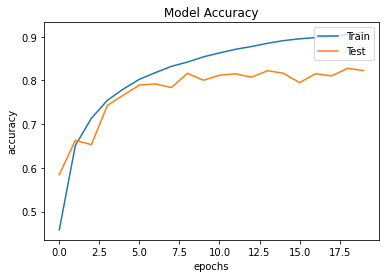

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'], loc = 'upper right')
plt.show()

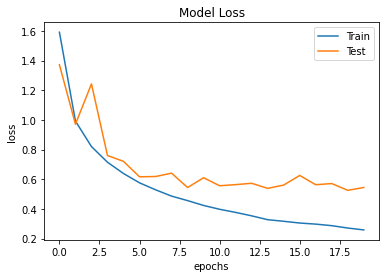

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train', 'Test'], loc = 'upper right')
plt.show()